# Setup

In [1]:
import numpy as np
import h5py as h
import matplotlib.pyplot as plt
import matplotlib
from qutip import *

In [2]:
matplotlib.rcParams.update(
        {"font.family": "Times New Roman",
         "font.variant": "normal",
         "font.weight": "roman",
         "xtick.labelsize": 15,
         "xtick.direction": "in",
         "xtick.major.pad": 8,
         "xtick.top": True,
         "ytick.right": True,
         "ytick.direction": "in",
         "ytick.labelsize": 15,
#          "axes.prop_cycle": (matplotlib.cycler("color", ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])),
         "axes.labelsize": 15,
         "axes.labelpad": 10,
         "axes.grid": True
    }
)

In [3]:
np.arctan(1.5)

0.982793723247329

In [4]:
np.arctan2(0.15, 0.1)

0.982793723247329

In [5]:
cd "D:\OneDrive\STUDY\Research Now\Hyper-Ramsey (Ion Trap)\#14-Experiment Taking Data\lattice_notebooks-master\nlqm\data"

D:\OneDrive\STUDY\Research Now\Hyper-Ramsey (Ion Trap)\#14-Experiment Taking Data\lattice_notebooks-master\nlqm\data


In [6]:
ls

 驱动器 D 中的卷是 OneDrive
 卷的序列号是 A658-5607

 D:\OneDrive\STUDY\Research Now\Hyper-Ramsey (Ion Trap)\#14-Experiment Taking Data\lattice_notebooks-master\nlqm\data 的目录

2022-01-09  下午 10:13    <DIR>          .
2022-01-09  下午 01:24    <DIR>          ..
2022-01-07  下午 04:59             6,148 .DS_Store
2022-01-09  下午 01:24    <DIR>          .ipynb_checkpoints
2022-01-09  下午 01:24    <DIR>          2021-08-25
2022-01-09  下午 01:24    <DIR>          2021-08-26
2022-01-09  下午 01:25    <DIR>          2021-08-29
2022-01-09  下午 01:25    <DIR>          2021-11-05
2022-01-09  下午 01:25    <DIR>          2021-11-06
2022-01-09  下午 01:26    <DIR>          2021-11-07
2022-01-09  下午 01:26    <DIR>          2021-11-29
2022-01-09  下午 01:26    <DIR>          2021-12-17
2022-01-09  下午 01:27    <DIR>          2021-12-27
2022-01-09  下午 01:27    <DIR>          2021-12-28
2022-01-09  下午 10:13    <DIR>          2022-01-06
2022-01-09  下午 01:27    <DIR>          2022-01-07
2022-01-08  上午 11:07    <DIR>          2022-01-

# Load sim results

In [7]:
t_from_sim = np.load("../t_from_sim.npy")
γlist = np.load("../γlist.npy")
ramsey_decays = []
ramsey_decays_down = []
t_opts = []
for γ in γlist:
    ramsey_decays.append(np.load("../ramsey_decay_from_sim{}.npy".format(γ)))
    t_opts.append(np.load("../topt_from_sim{}.npy".format(γ)))
    ramsey_decays_down.append(np.load("../ramsey_decay_down_from_sim{}.npy".format(γ)))
print(γlist)

[10 20 30]


# Long Ramsey

In [8]:
s = "scan_data"
'''
filename = 'D:/OneDrive/STUDY/Research Now/Hyper-Ramsey (Ion Trap)/#14-Experiment Taking Data/data/'+data_temp+'.h5'
f = h5py.File(filename, 'r')
'''
d = h.File("2021-11-05/NLQMRamsey/1526_48.h5", "r")[s]
d1 = h.File("2021-11-05/NLQMRamsey/1540_59.h5", "r")[s]
d2 = h.File("2021-11-05/NLQMRamsey/1612_53.h5", "r")[s]
x,y = list(d.keys()); list(d.keys())

['NLQM.additional_wait_time', 'Ramsey-ion number:0']

In [9]:
de = h.File("2021-11-05/NLQMRamsey/1508_55.h5", "r")[s]
de1 = h.File("2021-11-05/NLQMRamsey/1515_40.h5", "r")[s]
x,y = list(d.keys()); list(d.keys())

ramsx, ramsy = d[x][()], d[y][()]
rams1x, rams1y = d1[x][()], d1[y][()]
rams2x, rams2y = d2[x][()], d2[y][()]
echox, echoy = de[x][()], de[y][()]
echo1x, echo1y = de1[x][()], de1[y][()]

(0.0, 50.0)

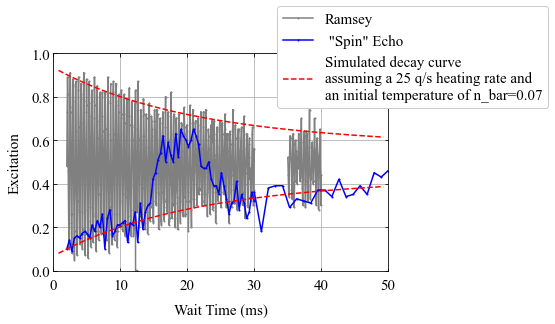

In [10]:
plt.plot(d[x][()] * 1e3, d[y][()], color="gray", marker="o", ms=1)
plt.plot(d1[x][()] * 1e3, d1[y][()], color="gray", marker="o", ms=1)
plt.plot(d2[x][()] * 1e3, d2[y][()], color="gray", marker="o", ms=1, label="Ramsey")
plt.plot(de[x][()] * 1e3, de[y][()], color="b", marker="o", ms=1)
plt.plot(de1[x][()] * 1e3, de1[y][()], color="b", marker="o", ms=1, label=' "Spin" Echo')
plt.plot(t_from_sim, ramsey_decays[1][:195], color="red", ls="--")
plt.plot(t_from_sim, ramsey_decays_down[1][:195], color="red", ls="--", label="Simulated decay curve\nassuming a 25 q/s heating rate and\nan initial temperature of n_bar=0.07")
plt.legend(loc=1, fontsize=15, bbox_to_anchor=(1.5, 1.25), framealpha=1)
plt.ylabel("Excitation", fontsize=15)
plt.xlabel("Wait Time (ms)", fontsize=15)
plt.ylim(0, 1)
plt.xlim(0, 50)

# 3 pointers

## add_data function

In [35]:
add_quad = lambda X: np.sqrt(np.sum([x**2 for x in X])) / len(X)

#store = {}
def add_data(wait_time, title, cutoff=None, ignore_contrast=None):
    #store = wait_time
    #print(wait_time)
    existing_wait_times = phase.keys()
    day, time = title.split("/")
    data = h.File(day + "/NLQMRamsey/" + "NLQM-" + time + ".h5", "r")["scan_data"]
    data_flipped = h.File(day + "/NLQMRamsey/" + "FlippedNLQM-" + time + ".h5", "r")["scan_data"]
    
    phases = data["phase"][()]
    phases_error = data["phase_error"][()]
    phases_flipped = data_flipped["phase"][()]
    phases_error_flipped = data_flipped["phase_error"][()]
    difference_phases = []
    difference_phases_error = []

    contrasts = data["contrast"][()]
    contrasts_error = data["contrast_error"][()]
    contrasts_flipped = data_flipped["contrast"][()]
    contrasts_error_flipped = data_flipped["contrast_error"][()]
    average_contrast = []
    average_contrast_error = []

    offsets = data["offset"][()]
    offsets_error = data["offset_error"][()]
    offsets_flipped = data_flipped["offset"][()]
    offsets_error_flipped = data_flipped["offset_error"][()]
    average_offset = []
    average_offset_error = []

    N = min(len(phases[:cutoff]), len(phases_flipped[:cutoff]))
    for i in range(N):
        average_contrast_i = (contrasts[i] + contrasts_flipped[i]) / 2
        if ignore_contrast is not None:
            mean_cont = np.mean(contrasts)
            mean_cont_flipped = np.mean(contasts_flipped)
            mean_cont_combined = (mean_cont + mean_cont_flipped) / 2
            if average_contrast_i < mean_cont_combined * ignore_contrast:
                continue
        pdiff = phases[i] - phases_flipped[i]
        if pdiff > 180:
            pdiff = 360 - pdiff
        elif pdiff < -180:
            pdiff = -360 - pdiff
        difference_phases.append(pdiff)
        difference_phases_error.append(np.sqrt(phases_error[i]**2 + phases_error_flipped[i]**2))
        average_contrast.append(average_contrast_i)
        average_contrast_error.append(np.sqrt(contrasts_error[i]**2 + contrasts_error_flipped[i]**2) / 2)
        average_offset.append((offsets[i] + offsets_flipped[i]) / 2)
        average_offset_error.append(np.sqrt(offsets_error[i]**2 + offsets_error_flipped[i]**2) / 2)
        
    if wait_time in existing_wait_times:
        phase[wait_time][0] += difference_phases
        phase[wait_time][1] += difference_phases_error
        contrast[wait_time][0] += average_contrast
        contrast[wait_time][1] += average_contrast_error
        offset[wait_time][0] += average_offset
        offset[wait_time][1] += average_offset_error
        straight_phase[wait_time][0] = np.concatenate([straight_phase[wait_time][0], phases])
        straight_phase[wait_time][1] = np.concatenate([straight_phase[wait_time][1], phases_error]) 
        straight_phase_flipped[wait_time][0] = np.concatenate([straight_phase_flipped[wait_time][0], phases_flipped])
        straight_phase_flipped[wait_time][1] = np.concatenate([straight_phase_flipped[wait_time][1], phases_error_flipped])
    else:
        phase[wait_time] = [difference_phases, difference_phases_error]
        contrast[wait_time] = [average_contrast, average_contrast_error]
        offset[wait_time] = [average_offset, average_offset_error]
        straight_phase[wait_time] = [phases, phases_error]
        straight_phase_flipped[wait_time] = [phases_flipped, phases_error_flipped]
    
    #print(phase[wait_time][0][-4:])
    #del phase[32.5][0][-4:]
    if(wait_time == 32.5):
        std = np.std(phase[wait_time][0][0:-4], ddof=1)
    elif(wait_time == 37.5):
        std = np.std(phase[wait_time][0][0:-10], ddof=1)
    else:
        std = np.std(phase[wait_time][0], ddof=1)
    #print(type(std))
    std_phase[wait_time] = [std, std / np.sqrt(2 * (len(phase[wait_time][0]) - 1))]
    mean_phase[wait_time] = [np.mean(phase[wait_time][0]), add_quad(phase[wait_time][1])]
    mean_contrast[wait_time] = [np.mean(contrast[wait_time][0]), add_quad(contrast[wait_time][1])]
    mean_offset[wait_time] = [np.mean(offset[wait_time][0]), add_quad(offset[wait_time][1])]

## add/view data

In [36]:
phase = {}
contrast = {}
offset = {}
mean_phase = {}
mean_contrast = {}
mean_offset = {}
std_phase = {}
straight_phase = {}
straight_phase_flipped = {}

# new data
data = [
    ######## 2021-12-27 ########
    (5,  "2021-12-27/2059_41"),
    (5,  "2021-12-27/2107_57"),
    (5,  "2021-12-27/2145_11"),
    (5,  "2021-12-27/2152_25"),
    (5,  "2021-12-27/2159_20"),
    (1,  "2021-12-27/1900_45"),
    (10,  "2021-12-27/2000_48"),
    (10,  "2021-12-27/2018_00"),
    (20,  "2021-12-27/1924_24"),
    (20,  "2021-12-27/1931_19"),
    ######## 2021-12-28 ########
    (8,  "2021-12-28/1513_31"),
    (12,  "2021-12-28/1730_19"),
    (12,  "2021-12-28/1750_20"),
    (12,  "2021-12-28/1753_26"),
    (12,  "2021-12-28/1800_38"),
    (14,  "2021-12-28/1926_05"),
    (14,  "2021-12-28/1946_13"),
    (14,  "2021-12-28/1949_23"),
    (14,  "2021-12-28/1953_47"),
    (16,  "2021-12-28/1957_42"),
    (18,  "2021-12-28/1614_31"),
    (22,  "2021-12-28/1814_18"),
    (22,  "2021-12-28/1907_28"),
    (24,  "2021-12-28/2029_38"),
    (30,  "2021-12-28/1541_57"),
    (35,  "2021-12-28/2114_34"),
    (40,  "2021-12-28/1650_02"),
    ######## 2022-01-07 ########
    (1,      "2022-01-06/2121_09"),
    (2.74,   "2022-01-07/1213_23"),
    (5.4,    "2022-01-07/1253_10"),
    #(15.7,   "2022-01-07/1614_46"), #This data was actually ruined
    (15.7,   "2022-01-07/1706_53"),
    (20,     "2022-01-07/1435_27"),
    (27.5,   "2022-01-07/1336_29"),
    (32.5,   "2022-01-07/1731_05"),
    (37.5,   "2022-01-07/1518_34"),
]

for data in data:
    add_data(*data)

L = list(phase.keys()); L.sort(); print(L)

[1, 2.74, 5, 5.4, 8, 10, 12, 14, 15.7, 16, 18, 20, 22, 24, 27.5, 30, 32.5, 35, 37.5, 40]


In [21]:
print(np.size(phase[2.74]))
print(phase[2.74][0])
print(phase[2.74][1])

44
[1.145762838175088, 14.822040630928583, 14.918241023023938, 28.65711745655811, -5.3893117599733955, 7.705365768288658, -7.109254099089512, 9.178822396416777, 3.2397002961021286, 21.69460979411123, 39.521154118971964, 25.26838611383124, 15.828420736955664, 22.365124368647514, 6.951603502167288, 9.886451444251577, 15.82392093202148, 17.731488925559333, 21.856168099351322, 27.233193245406696, 15.607618039506576, 33.204853291797235]
[9.679441207619147, 7.469561359851272, 8.295199659098953, 9.90792683906515, 9.943024342880836, 9.44911973008649, 8.616020837618718, 7.8981900824437306, 10.5104674364701, 8.601980771073112, 11.21745410678064, 8.701316381047777, 8.143825823336558, 9.484877687216478, 8.998967154261672, 9.071018239927634, 10.509316317989278, 8.526183869001088, 8.518070330386578, 11.163059148917375, 8.788092986988225, 9.61315139126699]


<ipython-input-22-f2761d8c440d>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N = np.arange(len(phase[i][0]), dtype=np.float)


Text(0.5, 0.98, '1 ms wait time')

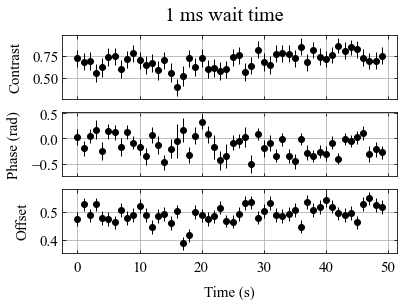

In [22]:
i = 1
plot_kwargs = {"marker": "o", "color": "k", "lw": 0, "elinewidth": 1}
fig, ax = plt.subplots(3, 1, sharex=True)
N = np.arange(len(phase[i][0]), dtype=np.float)
# N *= (100 * 16e-3 * 2) # reps * duration * 2 for flip
ax[0].errorbar(N, contrast[i][0], yerr=contrast[i][1], **plot_kwargs)
ax[0].set_ylabel("Contrast")
ax[1].errorbar(N, np.deg2rad(phase[i][0]), yerr=np.deg2rad(phase[i][1]), **plot_kwargs)
ax[1].set_ylabel("Phase (rad)")
# ax[1].yaxis.set_label_position("right")
ax[2].errorbar(N, offset[i][0], yerr=offset[i][1], **plot_kwargs)
ax[2].set_ylabel("Offset")
plt.xlabel("Time (s)")
plt.suptitle("{} ms wait time".format(i), fontsize=20)

<ipython-input-23-488510087c02>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N1 = np.arange(len(straight_phase[i][0]), dtype=np.float)
<ipython-input-23-488510087c02>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N2 = np.arange(len(straight_phase_flipped[i][0]), dtype=np.float)


Text(0.5, 0.98, '5 ms wait time')

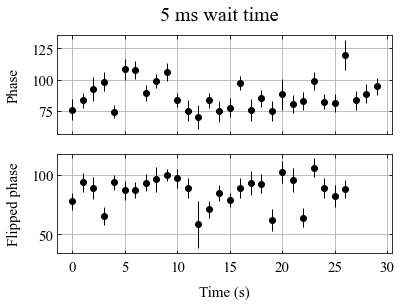

In [23]:
i = 5
plot_kwargs = {"marker": "o", "color": "k", "lw": 0, "elinewidth": 1}
fig, ax = plt.subplots(2, 1, sharex=True)
N1 = np.arange(len(straight_phase[i][0]), dtype=np.float)
N2 = np.arange(len(straight_phase_flipped[i][0]), dtype=np.float)
# N *= (100 * 16e-3 * 2) # reps * duration * 2 for flip
ax[0].errorbar(N1, straight_phase[i][0], yerr=straight_phase[i][1], **plot_kwargs)
ax[0].set_ylabel("Phase")
ax[1].errorbar(N2, straight_phase_flipped[i][0], yerr=straight_phase_flipped[i][1], **plot_kwargs)
ax[1].set_ylabel("Flipped phase")
plt.xlabel("Time (s)")
plt.suptitle("{} ms wait time".format(i), fontsize=20)

Text(0.5, 1.0, 'Averaged Values')

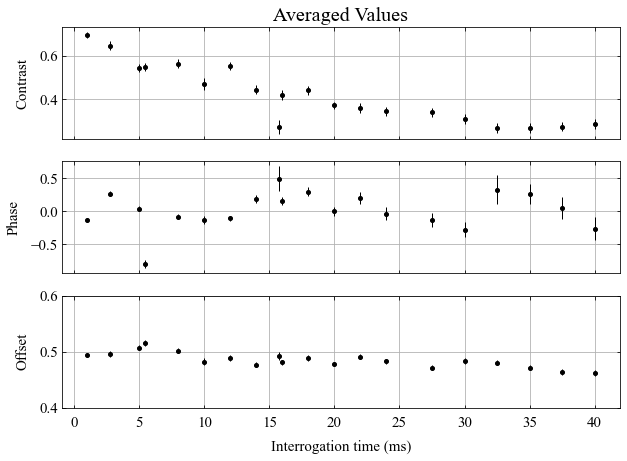

In [37]:
plot_kwargs = {"marker": "o", "color": "k", "lw": 0, "elinewidth": 1, "ms": 4}
times = mean_phase.keys()
fig, ax = plt.subplots(3, 1, figsize=(10,7), sharex=True)
ax[0].errorbar(times, [mean_contrast[time][0] for time in times], yerr=[mean_contrast[time][1] for time in times], 
             **plot_kwargs)
ax[0].set_ylabel("Contrast")
ax[1].errorbar(times, [np.deg2rad(mean_phase[time][0]) for time in times], yerr=[np.deg2rad(mean_phase[time][1]) for time in times], 
             **plot_kwargs)
ax[1].set_ylabel("Phase")
ax[2].errorbar(times, [mean_offset[time][0] for time in times], yerr=[mean_offset[time][1] for time in times], 
             **plot_kwargs)
ax[2].set_ylabel("Offset")
# ax[0].set_ylim(0, 1)
# ax[1].set_ylim(-0.25, 0.25)
ax[2].set_ylim(0.4, 0.6)
plt.xlabel("Interrogation time (ms)")
ax[0].set_title("Averaged Values", fontsize=20)

In [25]:
t_from_sim = np.load("../t_from_sim.npy")
t_from_sim_decay_curve = np.load("../t_from_sim_decay_curve.npy")
γlist = np.load("../γlist.npy")
ramsey_decays = []
ramsey_decays_down = []
t_opts = []
for γ in γlist:
    ramsey_decays.append(np.load("../ramsey_decay_from_sim{}.npy".format(γ)))
    t_opts.append(np.load("../topt_from_sim{}.npy".format(γ)))
    ramsey_decays_down.append(np.load("../ramsey_decay_down_from_sim{}.npy".format(γ)))
print(γlist)

[10 20 30]


(0.5, 42.0)

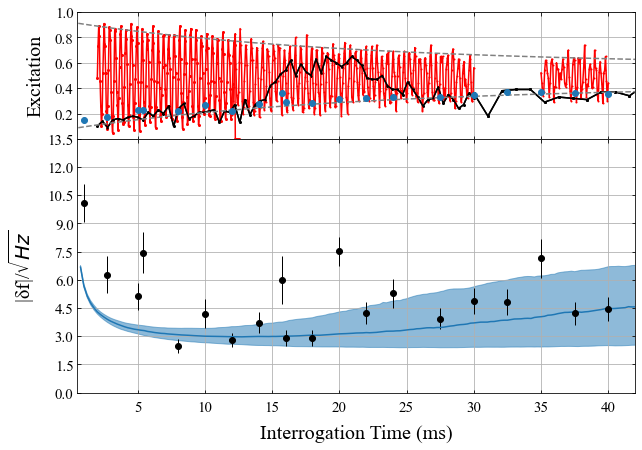

In [38]:
plot_kwargs = {"marker": "o", "lw": 0, "elinewidth": 1, "ms": 6}
fig, ax = plt.subplots(2, 1, figsize=(10,7), gridspec_kw={'height_ratios': [1, 2]}, sharex=True)

ax[0].errorbar(times, [(-mean_contrast[time][0]+1)/2 for time in times], yerr=[mean_contrast[time][1] for time in times], 
             **plot_kwargs)

ax[0].plot(echox * 1e3, echoy, color="k", marker="o", ms=2)
ax[0].plot(echo1x * 1e3, echo1y, color="k", marker="o", ms=2)
ax[0].plot(ramsx * 1e3, ramsy, color="r", marker="o", ms=2)
ax[0].plot(rams1x * 1e3, rams1y, color="r", marker="o", ms=1)
ax[0].plot(rams2x * 1e3, rams2y, color="r", marker="o", ms=1)
ax[0].plot(echox * 1e3, echoy, color="k", marker="o", ms=1)
ax[0].plot(echo1x * 1e3, echo1y, color="k", marker="o", ms=2)
ramsey_i = 1
ax[0].plot(t_from_sim_decay_curve, ramsey_decays[ramsey_i], color="gray", ls="--")
ax[0].plot(t_from_sim_decay_curve, ramsey_decays_down[ramsey_i], color="gray", ls="--")

A = 1
B = 0
# ax[1].plot(t_from_sim, S_from_sim15, label="theory", color="C0")
ax[1].plot(t_from_sim + B, t_opts[1] + A, color="C0")
ax[1].fill_between(t_from_sim + B, t_opts[0] + A, t_opts[-1] + A, 
                   alpha=0.5, label="theory", color="C0")

std_times = []; std_vals = []; std_errs = []
for key,val in std_phase.items():
    std_times.append(key)
    std_vals.append(np.sqrt(100) * np.deg2rad(val[0]) / np.sqrt(key * 1e-3) / (2 * np.pi))
    std_errs.append(np.sqrt(100) * np.deg2rad(val[1]) / np.sqrt(key * 1e-3) / (2 * np.pi))
l = ax[1].errorbar(std_times, std_vals, yerr=std_errs, **plot_kwargs, color="k")
# l = ax[1].plot(time_list, [std_list_radians[i] / (time_list_seconds[i]**(1/2)) for i in range(len(time_list))], 
#                lw=0, marker="o", color="k", ls="--", label="experiment")

ax[0].grid(True)
# ax[1].legend(loc=1, fontsize=15, bbox_to_anchor=(1.525, 1.5), fancybox=False, edgecolor="k")
ax[1].grid(True)
ax[0].set_ylabel("Excitation", fontsize=20)
ax[1].set_ylabel(r"|δf|/$\sqrt{Hz}$", fontsize=20, fontweight=10)
ax[1].set_xlabel("Interrogation Time (ms)", fontsize=20)
ax[0].set_ylim(0, 1)
ax[0].set_yticks([0.2, .4, .6, .8, 1])
ax[1].set_yticks([0, 1.5, 3, 4.5, 6, 7.5, 9, 10.5, 12, 13.5])
# ax[1].set_yticklabels([0, "2.0", "4.0"])
ax[1].set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
l[0].set_clip_on(False)
# ax[1].set_yticklabels(["-π", "-π/2", "0", "π/2", "π"])
# ax[0].set_xticks([])
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig('D:/OneDrive/STUDY/Research Now/Hyper-Ramsey (Ion Trap)/#14-Experiment Taking Data/data.jpg')
plt.xlim(0.5, 42)